<font size ="8"> <div align="center">**Visualizing t-SNE and Principal Component Analysis**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

-----
# **Context of the Exercise (MNIST Digit Visualization)**
-----
<p align = "justify">
The <b>MNIST</b> dataset is an acronym that stands for the <b>Modified National Institute of Standards and Technology</b> dataset.

**This dataset consists of 60,000 grayscale images**, which are small 28x28 pixel images.
> **These are images of handwritten digits from 0 to 9.**

In this exercise, we will work on this **image data of handwritten digits** and will **visualize the images in two-dimensional space** using the two dimensionality reduction techniques:
* t-distributed Stochastic Neighbor Embedding (t-SNE)
* Principal Component Analysis (PCA)



-----
## **Data Description**
-----
<p align = "justify">
We will use the datasets module of the sklearn library to load the data and will only consider 6 classes, i.e., <b>digits from 0 to 5</b>.

---
## **Goals of the Study**
---
<p align = "justify">
The primary goal of this exercise is to implement two <b>Dimensionality Reduction</b> methods on the MNIST dataset, using python and its libraries. By generating scatter plots to visualize these implementations, the differences between the two methods can be clearly illustrated.

**Importing the libraries**

In [1]:
# Importing the necessary libraries

from time import time                                   # For accessing time dimensions
import numpy as np                                      # For carrying out calculations

import matplotlib.pyplot as plt                         # For plotting and editing graphs
import seaborn as sns
from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition   # For loading the Dataset and methods

import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [2]:
# Loading the data using the sklearn library

digits = datasets.load_digits(n_class = 6)

X = digits.data                             # X variable will hold the Digits Data
y = digits.target                           # y variable will hold the target values (actual digits)

n_samples, n_features = X.shape
n_neighbors = 30

In [3]:
# Printing the dimensions of X
X.shape

(1083, 64)

- X has **1083 different images** and **each image is represented in 64 dimensions.**
- This is to say that the dataset is composed of 1083 different handwritten digits (`0, 1, 2, 3, 4, 5`) which are represented by 64 features

**Reducing the Dimensions of the Data**
* **From 64 features**, `Principal Component Analysis (PCA)` and `t-distributed Stochastic Neighbor Embedding` will be used to re-cast the data **down to 2 features**
* The reduced data will then be plotted into a 2D plot

In [4]:
# Carrying out the Dimensionality Reduction using Manifold libary in sklearn

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
t0 = time()                                                              # Initializing count for time of t-SNE calculation
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)   # Using .TSNE function to carry out Dim Red
X_tsne = tsne.fit_transform(X)                                           # fitting the data to the t-SNE Reduced model
t1 = time()                                                              # Clocking out
tsne_time = t1-t0
print("t-SNE-Embeddings in time {}".format(tsne_time),"\n", X_tsne)

print("***************************************************")

# Projection on the first 2 principal components using Principal Component Analysis
print("Computing PCA projection")
t0 = time()                                                              # Initializing count for time of PCA calculation
X_pca = decomposition.PCA(n_components = 2).fit_transform(X)             # Using .PCA function to reduce Dimensions of X
t1 = time()                                                              # Clocking out
pca_time = t1 - t0
print("PCA projections in time {}".format(pca_time), "\n", X_pca)

print("***************************************************")

Computing t-SNE embedding
t-SNE-Embeddings in time 7.4851157665252686 
 [[ 21.180876 -35.33142 ]
 [  8.994578  17.845446]
 [-14.165735  16.136713]
 ...
 [ 28.312653   8.818279]
 [ 31.68416    8.015219]
 [ 22.323965 -25.608608]]
***************************************************
Computing PCA projection
PCA projections in time 0.02412128448486328 
 [[ 10.76255844 -24.73806944]
 [ -0.62690579  26.83050009]
 [  1.68579972  12.29145392]
 ...
 [ 30.8498654    6.30638445]
 [ 32.14391392  10.57477502]
 [ 16.46964928 -21.36013722]]
***************************************************


- The **time taken to generate t-SNE embeddings is 7.485115 seconds, which is much longer** in comparison to the time taken to generate projections using PCA which only took 0.024 seconds.

**Visualizing the data with Dimensions Reduced by t-SNE and PCA**

Plotting **Scatter plots** for the generated embeddings and projections

In [5]:
# Function to create scatter plot

def scatter(X, title = None):
    x1 = []
    x2 = []

    plt.figure(figsize = (10, 10))
    plt.title(title)
    for i in X:
        x1.append(i[0])
        x2.append(i[1])
    sns.scatterplot(x = x1, y = x2)
    plt.show()

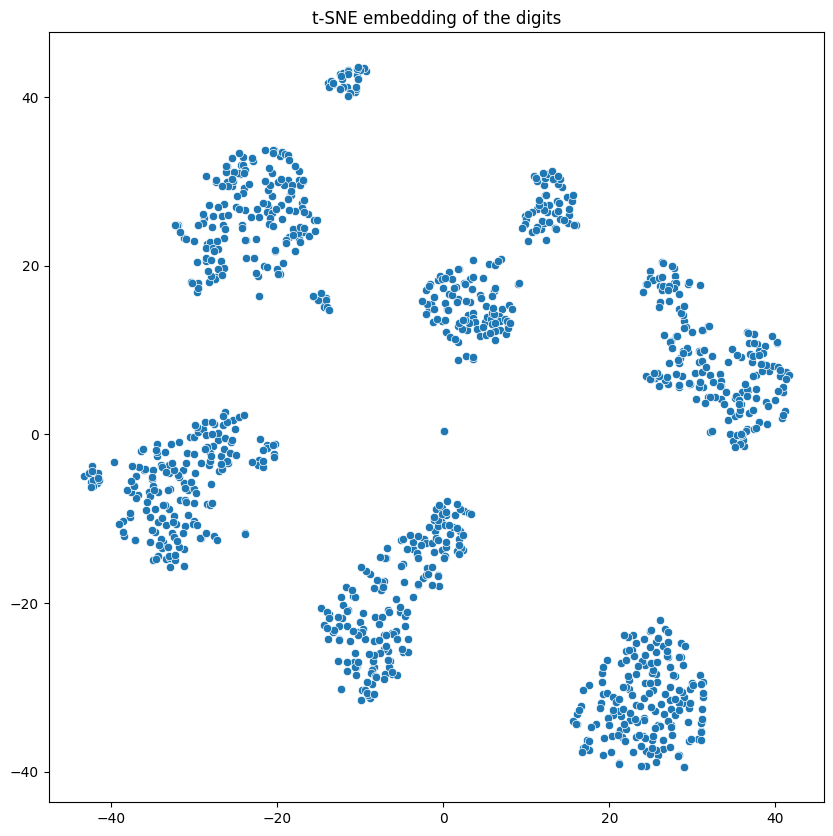

In [7]:
# Applying the plotting function on the t-SNE -projected Data
scatter(X_tsne, "t-SNE embedding of the digits")

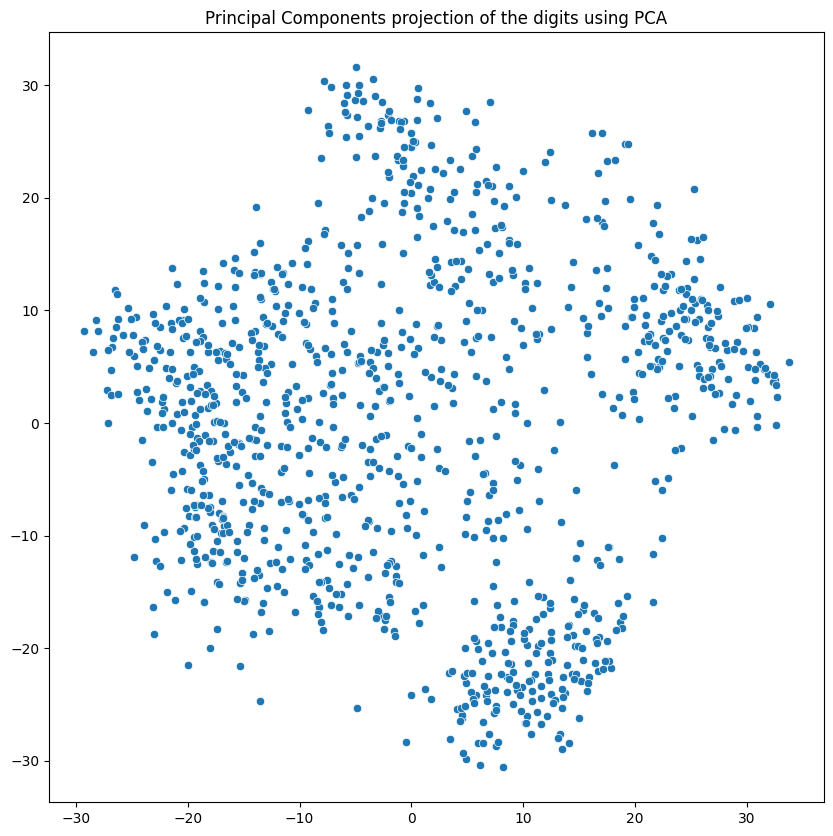

In [8]:
# Applying the plotting function on the PCE -reduced Data
scatter(X_pca, "Principal Components projection of the digits using PCA")

Now, let's use the **plot_embedding function**, mentioned in the introduction, to get to a **more advanced visualization**. The clusters will still appear in the same way, but will be more informative with annotations.

**Note:** The following code taken from scikit-learn is meant to annotate the embeddings created by PCA and t-SNE and provide a more labeled and informative visualization.

In [9]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):              # Passing the embedded array and the title of the graph
    print(X)

    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1
    plt.figure(figsize = (12, 12))               # Setting the figure size to a sufficiently large value
    ax = plt.subplot(111)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color = plt.cm.Set1(y[i] / 10.),
                 fontdict = {'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):

       # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])

        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue

            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

[[ 21.180876 -35.33142 ]
 [  8.994578  17.845446]
 [-14.165735  16.136713]
 ...
 [ 28.312653   8.818279]
 [ 31.68416    8.015219]
 [ 22.323965 -25.608608]]


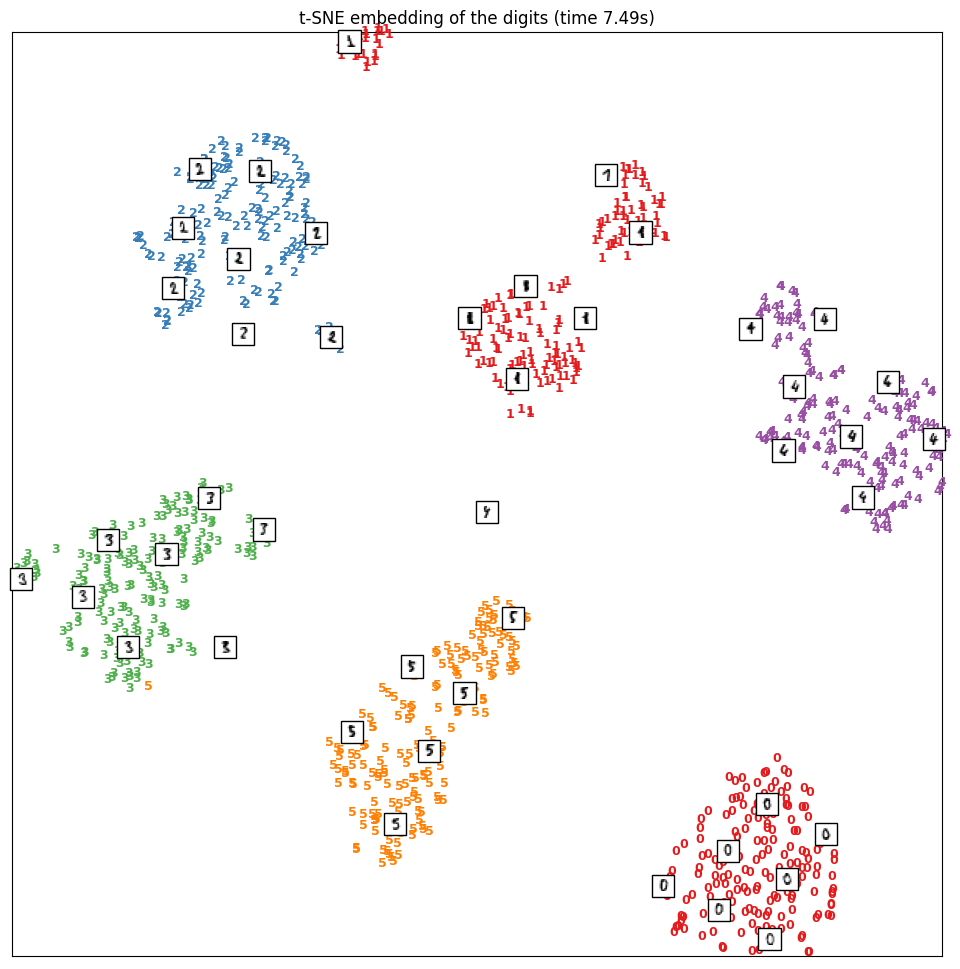

[[ 10.76255844 -24.73806944]
 [ -0.62690579  26.83050009]
 [  1.68579972  12.29145392]
 ...
 [ 30.8498654    6.30638445]
 [ 32.14391392  10.57477502]
 [ 16.46964928 -21.36013722]]


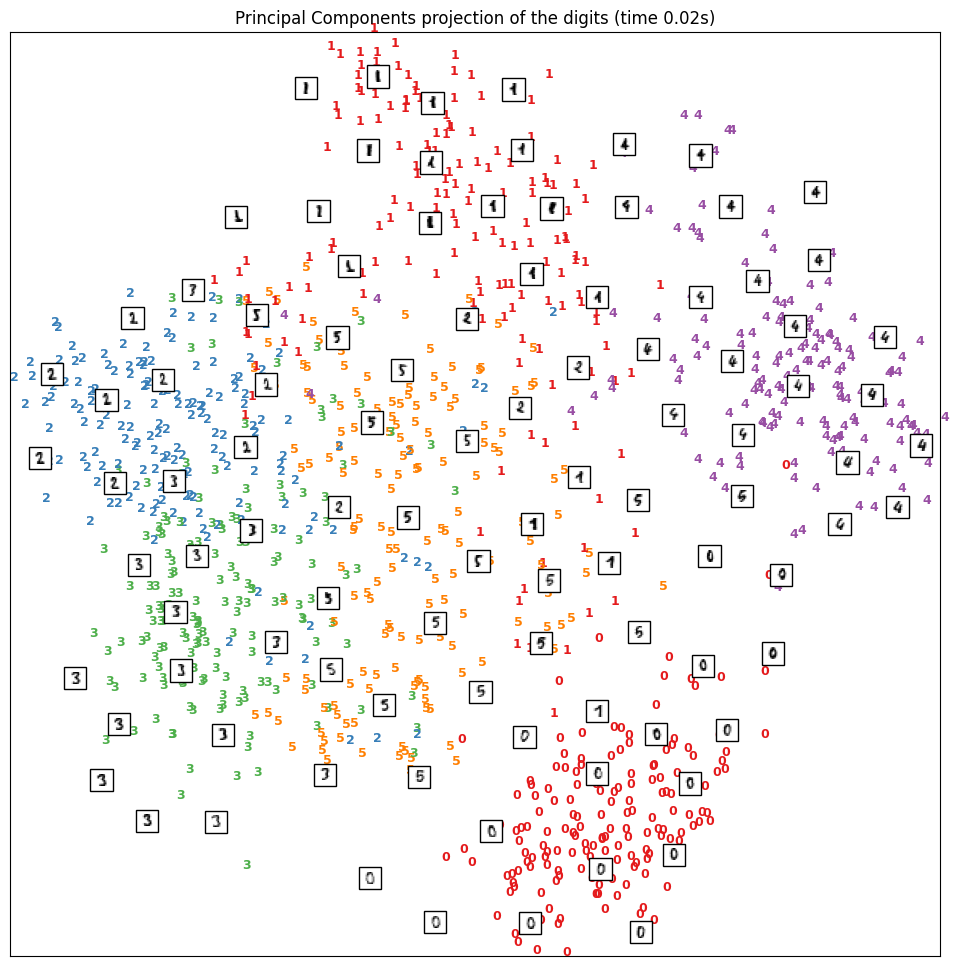

In [10]:
# Plotting t-SNE embeddings
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (tsne_time))

# Plotting PCA projections
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (pca_time))

## **Results and Conclusion**

- We have effectively reduced the dimensionality of the images, from 64 to 2, using t-SNE and PCA, and plotted the 2D embeddings and projections.
- Out of the two methods used above, **t-SNE takes a longer time to generate embeddings** but gives **better visualizations with well-separated clusters for each handwritten digit**.
- The annotations show that while PCA gives the same clusters, the overall plot represents more of a blob and is not as well-separated as t-SNE.

- **t-SNE is good for visualizing the data in lower dimensions but is very slow and should only be used on small datasets, whereas PCA is more computationally efficient and can be used on large datasets as well.**